In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import richardsplot as rplot

# We preview K2 long term systematics as a function of channel and magnitude

In [3]:
#import systematics lc data frame
all_channels_df = pd.read_pickle("../k2_c08_CCD_systematics.pkl")

# Using the dataframe

Lets say our kepler AGN is a 19.8 magnitude and on channel 57

In [11]:
mag = 19.8
channel = 22
#find all templates on that ccd channel
channelMask = (all_channels_df.channel == channel)
#pick the template lc that is closest in magnitude to our target on that specific channel
magnitudeMask = (np.abs(all_channels_df[channelMask].magnitude-mag)).idxmin()

In [12]:
#pull that row for from the dataframe, the template is stored in a row, rather than a column
row = all_channels_df.iloc[magnitudeMask]
#preview the row contents
row

0            -0.371327
1            -0.371327
2            -0.457090
3            -0.457090
4            -0.529100
5            -0.529100
6            -0.455215
7            -0.455215
8            -0.427499
9            -0.455215
10           -0.488750
11           -0.504617
12           -0.498232
13           -0.469206
14           -0.428414
15           -0.428414
16           -0.402573
17           -0.398900
18           -0.395903
19           -0.395903
20           -0.376933
21           -0.372854
22           -0.359459
23           -0.359459
24           -0.359459
25           -0.359459
26           -0.372854
27           -0.408669
28           -0.439221
29           -0.408669
               ...    
3827          0.468406
3828          0.468406
3829          0.468406
3830          0.502893
3831          0.497441
3832          0.468406
3833          0.497441
3834          0.503324
3835          0.474585
3836          0.476628
3837          0.493344
3838          0.516201
3839       

In [13]:
#pull the full template lc out of the row, ignore the last four columns
systematics_lc = row[:-4].values

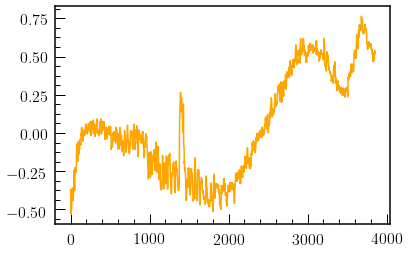

In [14]:
#preview the template lightcurve
plt.plot(systematics_lc, color = "orange")

## Preview the whole channel as a function of magnitude

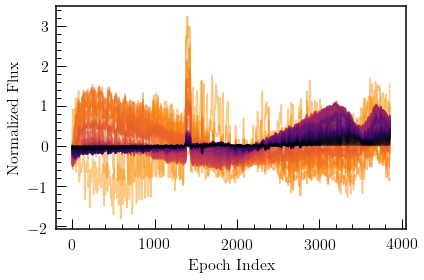

In [15]:
cmap = plt.get_cmap('inferno')
mag_colors = np.zeros((len(cmap.colors),4))
mag_colors[:,3] = 0.5 #this is the alpha parameter
mag_colors[:,:3] = cmap.colors



j = 0
for i in range(0,99, 1):
    row = all_channels_df[channelMask].iloc[i]
    systematics_lc = row[:-4].values
    plt.plot(systematics_lc, color =mag_colors[j*2] , zorder = 99-i)
    j +=1
#plt.plot(xrange(len(lc_med[:,-2])),lc_med[:,-2], label = "{:3.1f}".format(mag_med_bin_edges[-2]), alpha = 0.8) 
    
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")

plt.tight_layout()